In [59]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
sns.set(style="darkgrid",font_scale=1.5)
pd.set_option("display.max.rows",None)
pd.set_option("display.max.columns",None)


from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, StackingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier


from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, MinMaxScaler

from imblearn.over_sampling import SMOTE

In [60]:
train_df=pd.read_csv('/kaggle/input/spaceship-titanic/train.csv')
test_df=pd.read_csv('/kaggle/input/spaceship-titanic/test.csv')


In [61]:
train_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [62]:
test_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [63]:
print(train_df.shape)
print(test_df.shape)

(8693, 14)
(4277, 13)


In [64]:
#Checking Duplicates
print("Duplicates in Training Data")
print((train_df.duplicated().sum()),(100*train_df.duplicated().sum()/len(train_df)))
print("Duplicates in Test Data")
print((test_df.duplicated().sum()),(100*test_df.duplicated().sum()/len(test_df)))

Duplicates in Training Data
0 0.0
Duplicates in Test Data
0 0.0


In [65]:
print("Data types of Training Data")
print(train_df.dtypes)
print("*"*100)
print("\n")
print("Data types of Testing Data")
print(test_df.dtypes)

Data types of Training Data
PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object
****************************************************************************************************


Data types of Testing Data
PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
dtype: object


In [66]:
df1=(train_df.isnull().sum()[train_df.isnull().sum()>0]).to_frame().rename(columns={0:'No of Missing Values'})
df1['% of Missing Values']=round((100*train_df.isnull().sum()[train_df.isnull().sum()>0]/len(train_df)),2)
df1.sort_values(by=['% of Missing Values'],ascending=False,inplace=True)
df1


,No of Missing Values,% of Missing Values
CryoSleep,217,2.50
ShoppingMall,208,2.39
VIP,203,2.34
HomePlanet,201,2.31
Name,200,2.30
Cabin,199,2.29
VRDeck,188,2.16
FoodCourt,183,2.11
Spa,183,2.11
Destination,182,2.09


In [67]:
df2=(test_df.isnull().sum()[test_df.isnull().sum()>0]).to_frame().rename(columns={0:'No of Missing Values'})
df2['% of Missing Values']=round((100*test_df.isnull().sum()[test_df.isnull().sum()>0]/len(test_df)),2)
df2.sort_values(by=['% of Missing Values'],ascending=False,inplace=True)
df2

,No of Missing Values,% of Missing Values
FoodCourt,106,2.48
Spa,101,2.36
Cabin,100,2.34
ShoppingMall,98,2.29
Name,94,2.20
CryoSleep,93,2.17
VIP,93,2.17
Destination,92,2.15
Age,91,2.13
HomePlanet,87,2.03


In [68]:
#Checking Cardinality of Categorical Columns
print("cardinality of categorical features in training datasets is:")
print(train_df.select_dtypes(include="object").nunique())
print("\n","-"*70)
print("\nCardinality of categorical features in testing datsets is:")
print(test_df.select_dtypes(include="object").nunique())

cardinality of categorical features in training datasets is:
PassengerId    8693
HomePlanet        3
CryoSleep         2
Cabin          6560
Destination       3
VIP               2
Name           8473
dtype: int64

 ----------------------------------------------------------------------

Cardinality of categorical features in testing datsets is:
PassengerId    4277
HomePlanet        3
CryoSleep         2
Cabin          3265
Destination       3
VIP               2
Name           4176
dtype: int64


EDA

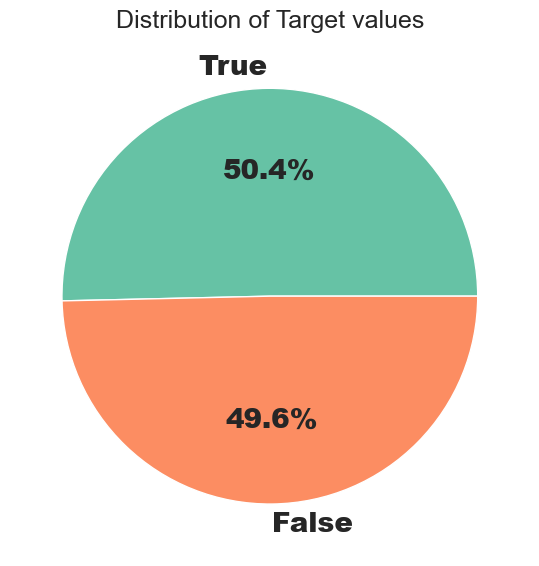

In [69]:
plt.figure(figsize = (10,6))
plt.pie(train_df['Transported'].value_counts(),labels=train_df['Transported'].value_counts().keys(),autopct="%1.1f%%",textprops={"fontsize":20,"fontweight":"black"},colors=sns.color_palette("Set2"))
plt.title("Distribution of Target values")
plt.tight_layout()
plt.show()

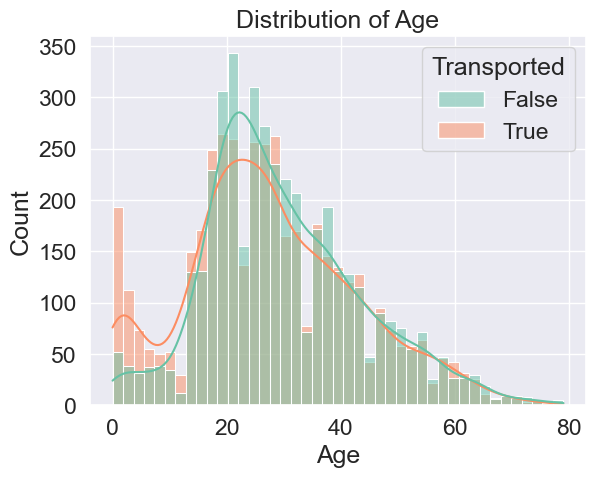

In [70]:
#Distribution of Age feature
sns.histplot(x=train_df['Age'],data=train_df,kde=True,hue="Transported",palette="Set2")
plt.title("Distribution of Age")
plt.show()

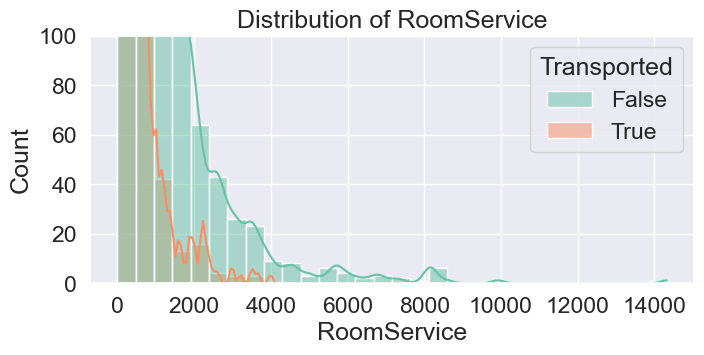

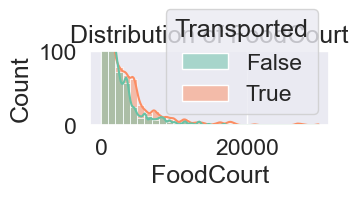

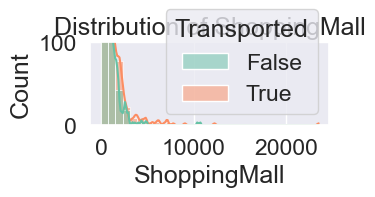

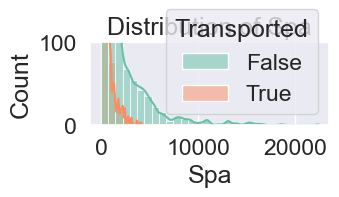

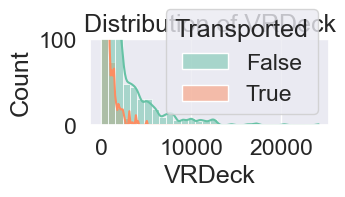

In [71]:
#Visualising All Expenditure features
exp_cols=["RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"]
plt.figure(figsize = (14,10))
for idx, column in enumerate(exp_cols):
    plt.subplot(3,2,idx+1)
    sns.histplot(x=column,data=train_df,kde=True,hue="Transported",bins=30,palette="Set2")
    plt.title(f"Distribution of {column}")
    plt.ylim(0,100)
    plt.tight_layout()
    plt.show()


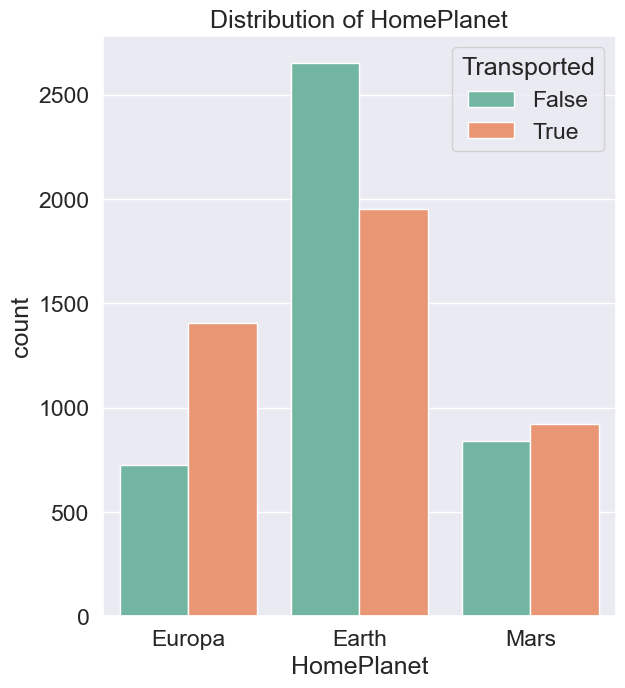

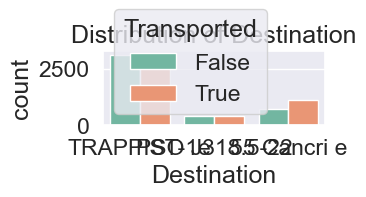

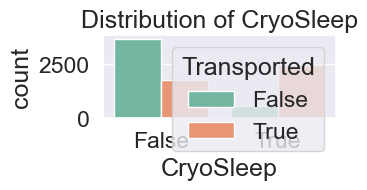

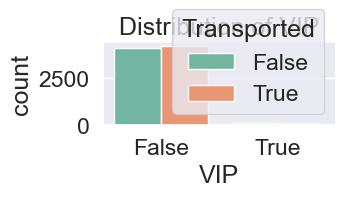

In [72]:
#Visualising Categorical features
cat_cols=["HomePlanet","Destination","CryoSleep","VIP"]
plt.figure(figsize = (12,20))
for idx, column in enumerate(cat_cols):
    plt.subplot(3,2,idx+1)
    sns.countplot(x=column, hue="Transported", data=train_df, palette="Set2")
    plt.title(f"Distribution of {column}")
    plt.tight_layout()
    plt.show()


In [73]:
#Feature Engineering
def passengerid_new_features(df):
    df['Group']=df['PassengerId'].apply(lambda x:x.split("_")[0])
    df['Member']=df['PassengerId'].apply(lambda x:x.split("_")[1])
    x=df.groupby("Group")["Member"].count().sort_values()
    y=set(x[x>1].index)
    df["Travelling_Solo"]=df["Group"].apply(lambda x:x not in y)
    df["Group_Size"]=0
    for i in x.items():
        df.loc[df["Group"]==i[0],"Group_Size"]=i[1]




In [74]:
passengerid_new_features(train_df)
passengerid_new_features(test_df)

In [75]:
train_df.drop(columns=["Group","Member"],inplace=True)
test_df.drop(columns=["Group","Member"],inplace=True)

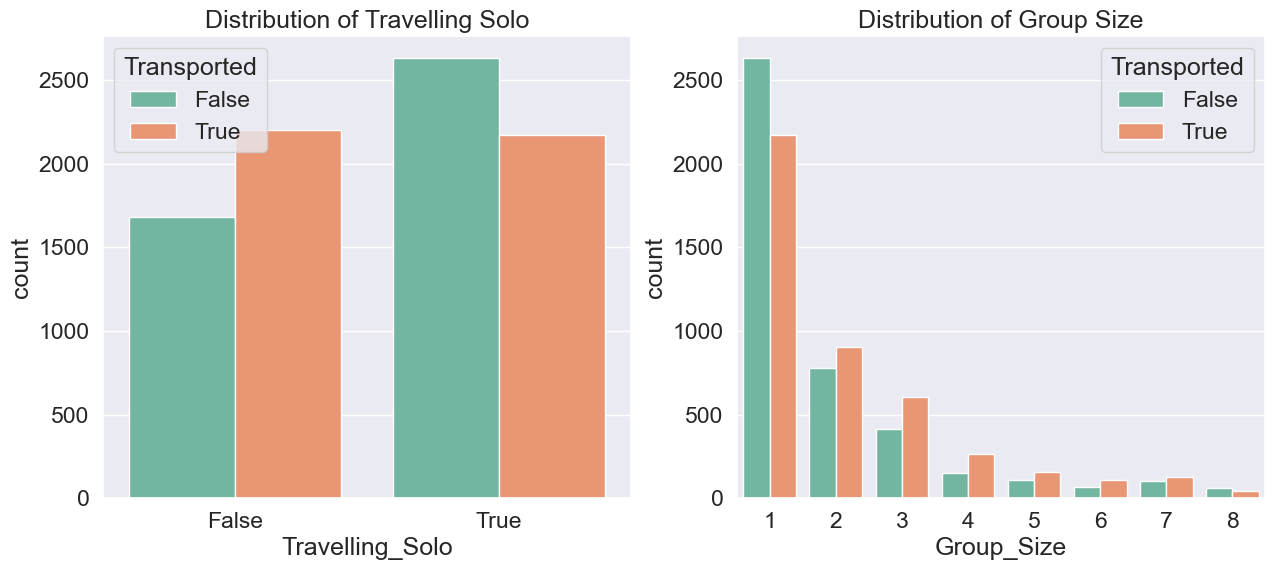

In [76]:
plt.figure(figsize = (15,6))
plt.subplot(1,2,1)
sns.countplot(x="Travelling_Solo",hue="Transported",data=train_df,palette="Set2")
plt.title("Distribution of Travelling Solo")

plt.subplot(1,2,2)
sns.countplot(x="Group_Size",hue="Transported",data=train_df,palette="Set2")
plt.title("Distribution of Group Size")
plt.show()



In [77]:
#Create new feature based on cabin
train_df["Cabin"].to_frame().head()

,Cabin
0,B/0/P
1,F/0/S
2,A/0/S
3,A/0/S
4,F/1/S


In [78]:
def cabin_new_feature(df):

    df["Cabin"].fillna("np.nan/np.nan/np.nan",inplace=True)  #In this way we can split NaN values into all three categories

    df["Cabin_Deck"] = df["Cabin"].apply(lambda x: x.split("/")[0])
    df["Cabin_Number"]  = df["Cabin"].apply(lambda x: x.split("/")[1])
    df["Cabin_Side"] = df["Cabin"].apply(lambda x: x.split("/")[2])

    #Replacing string nan values to numpy nan values..
    cols = ["Cabin_Deck","Cabin_Side"]
    df[cols]=df[cols].replace("np.nan",np.nan)

    #Filling Missing Values in new features created.
    df["Cabin_Deck"].fillna(df["Cabin_Deck"].mode()[0],inplace=True)
    df["Cabin_Side"].fillna(df["Cabin_Side"].mode()[0],inplace=True)
    df['Cabin_Number']=pd.to_numeric(df['Cabin_Number'],errors='coerce')
    df["Cabin_Number"].fillna(df["Cabin_Number"].median(),inplace=True)








In [79]:
cabin_new_feature(train_df)
cabin_new_feature(test_df)

In [80]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PassengerId      8693 non-null   object 
 1   HomePlanet       8492 non-null   object 
 2   CryoSleep        8476 non-null   object 
 3   Cabin            8693 non-null   object 
 4   Destination      8511 non-null   object 
 5   Age              8514 non-null   float64
 6   VIP              8490 non-null   object 
 7   RoomService      8512 non-null   float64
 8   FoodCourt        8510 non-null   float64
 9   ShoppingMall     8485 non-null   float64
 10  Spa              8510 non-null   float64
 11  VRDeck           8505 non-null   float64
 12  Name             8493 non-null   object 
 13  Transported      8693 non-null   bool   
 14  Travelling_Solo  8693 non-null   bool   
 15  Group_Size       8693 non-null   int64  
 16  Cabin_Deck       8693 non-null   object 
 17  Cabin_Number  

In [81]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PassengerId      4277 non-null   object 
 1   HomePlanet       4190 non-null   object 
 2   CryoSleep        4184 non-null   object 
 3   Cabin            4277 non-null   object 
 4   Destination      4185 non-null   object 
 5   Age              4186 non-null   float64
 6   VIP              4184 non-null   object 
 7   RoomService      4195 non-null   float64
 8   FoodCourt        4171 non-null   float64
 9   ShoppingMall     4179 non-null   float64
 10  Spa              4176 non-null   float64
 11  VRDeck           4197 non-null   float64
 12  Name             4183 non-null   object 
 13  Travelling_Solo  4277 non-null   bool   
 14  Group_Size       4277 non-null   int64  
 15  Cabin_Deck       4277 non-null   object 
 16  Cabin_Number     4277 non-null   float64
 17  Cabin_Side    

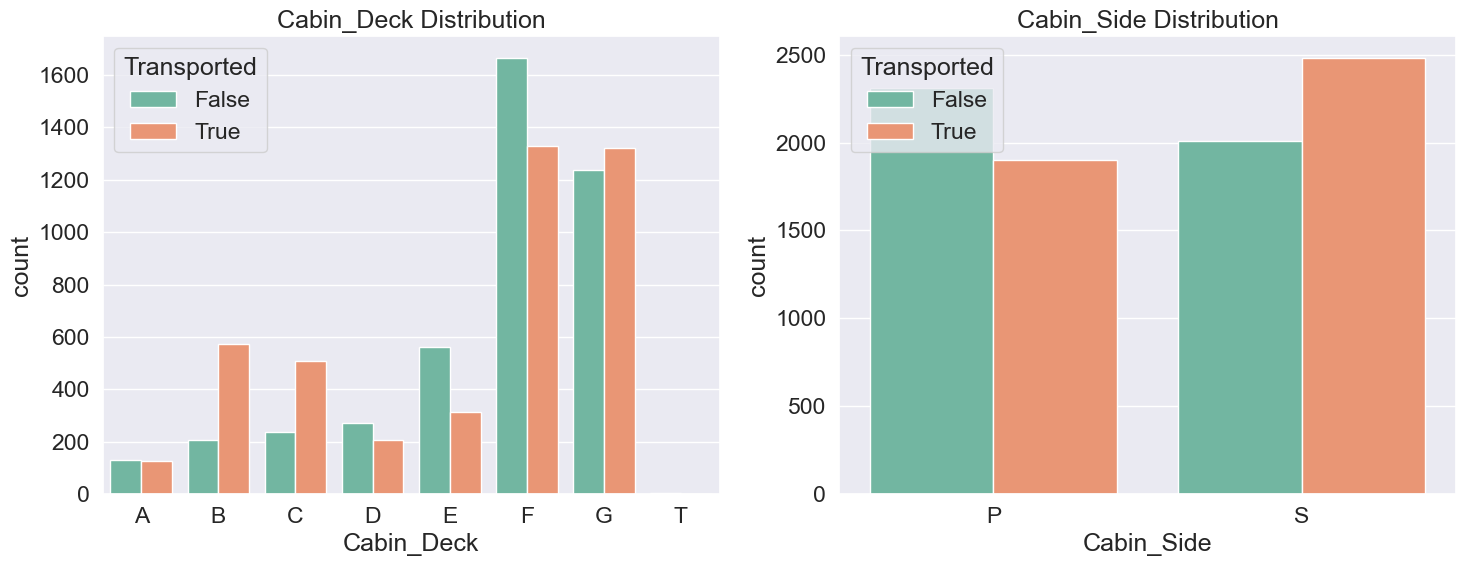

In [82]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.countplot(x="Cabin_Deck",hue="Transported", data=train_df, palette="Set2",order=["A","B","C","D","E","F","G","T"])
plt.title("Cabin_Deck Distribution")

plt.subplot(1,2,2)
sns.countplot(x="Cabin_Side", hue="Transported", data=train_df, palette="Set2")
plt.title("Cabin_Side Distribution")
plt.tight_layout()
plt.show()


In [83]:
print("Total Unique values present in Cabin_Number feature is:",train_df["Cabin_Number"].nunique())
print("The Mean of Cabin_Number Feature is: ",train_df["Cabin_Number"].mean())
print("The Median of Cabin_Number Feature is:",train_df["Cabin_Number"].median())
print("The Minimum value of Cabin_Number feature is:",train_df["Cabin_Number"].min())
print("The Maximum value of Cabin_number Feature is:",train_df["Cabin_Number"].max())


Total Unique values present in Cabin_Number feature is: 1817
The Mean of Cabin_Number Feature is:  596.3989416772115
The Median of Cabin_Number Feature is: 427.0
The Minimum value of Cabin_Number feature is: 0.0
The Maximum value of Cabin_number Feature is: 1894.0


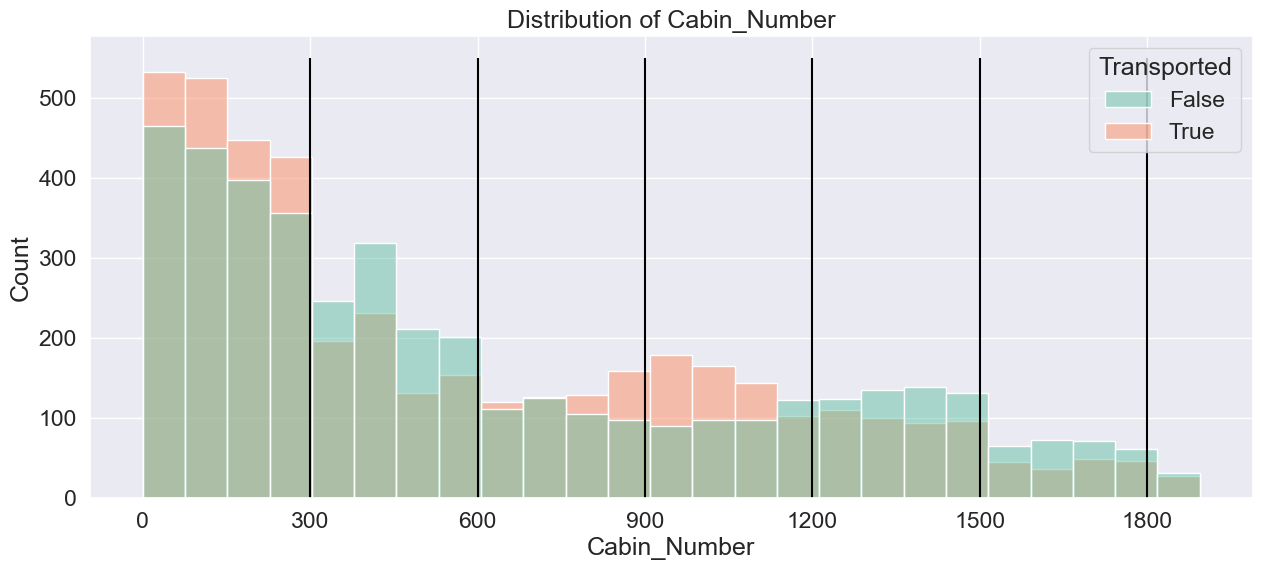

In [84]:
plt.figure(figsize=(15,6))
sns.histplot(x="Cabin_Number",data=train_df,hue="Transported",palette="Set2")
plt.title("Distribution of Cabin_Number")
plt.xticks(list(range(0,1900,300)))
plt.vlines(300,ymin=0,ymax=550,color='black')
plt.vlines(600,ymin=0,ymax=550,color='black')
plt.vlines(900,ymin=0,ymax=550,color='black')
plt.vlines(1200,ymin=0,ymax=550,color='black')
plt.vlines(1500,ymin=0,ymax=550,color='black')
plt.vlines(1800,ymin=0,ymax=550,color='black')
plt.show()

In [85]:
def cabin_regions(df):
    df['Cabin_Region1']=(df['Cabin_Number']<300)
    df['Cabin_Region2']=(df['Cabin_Number']>=300) & (df['Cabin_Number']<600)
    df['Cabin_Region3']=(df['Cabin_Number']>=600) & (df['Cabin_Number']<900)
    df['Cabin_Region4']=(df['Cabin_Number']>=900) & (df['Cabin_Number']<1200)
    df['Cabin_Region5']=(df['Cabin_Number']>=1200) & (df['Cabin_Number']<1500)
    df['Cabin_Region6']=(df['Cabin_Number']>=1500)

In [86]:
cabin_regions(train_df)
cabin_regions(test_df)

In [87]:
train_df.drop('Cabin_Number',axis=1,inplace=True)
test_df.drop('Cabin_Number',axis=1,inplace=True)

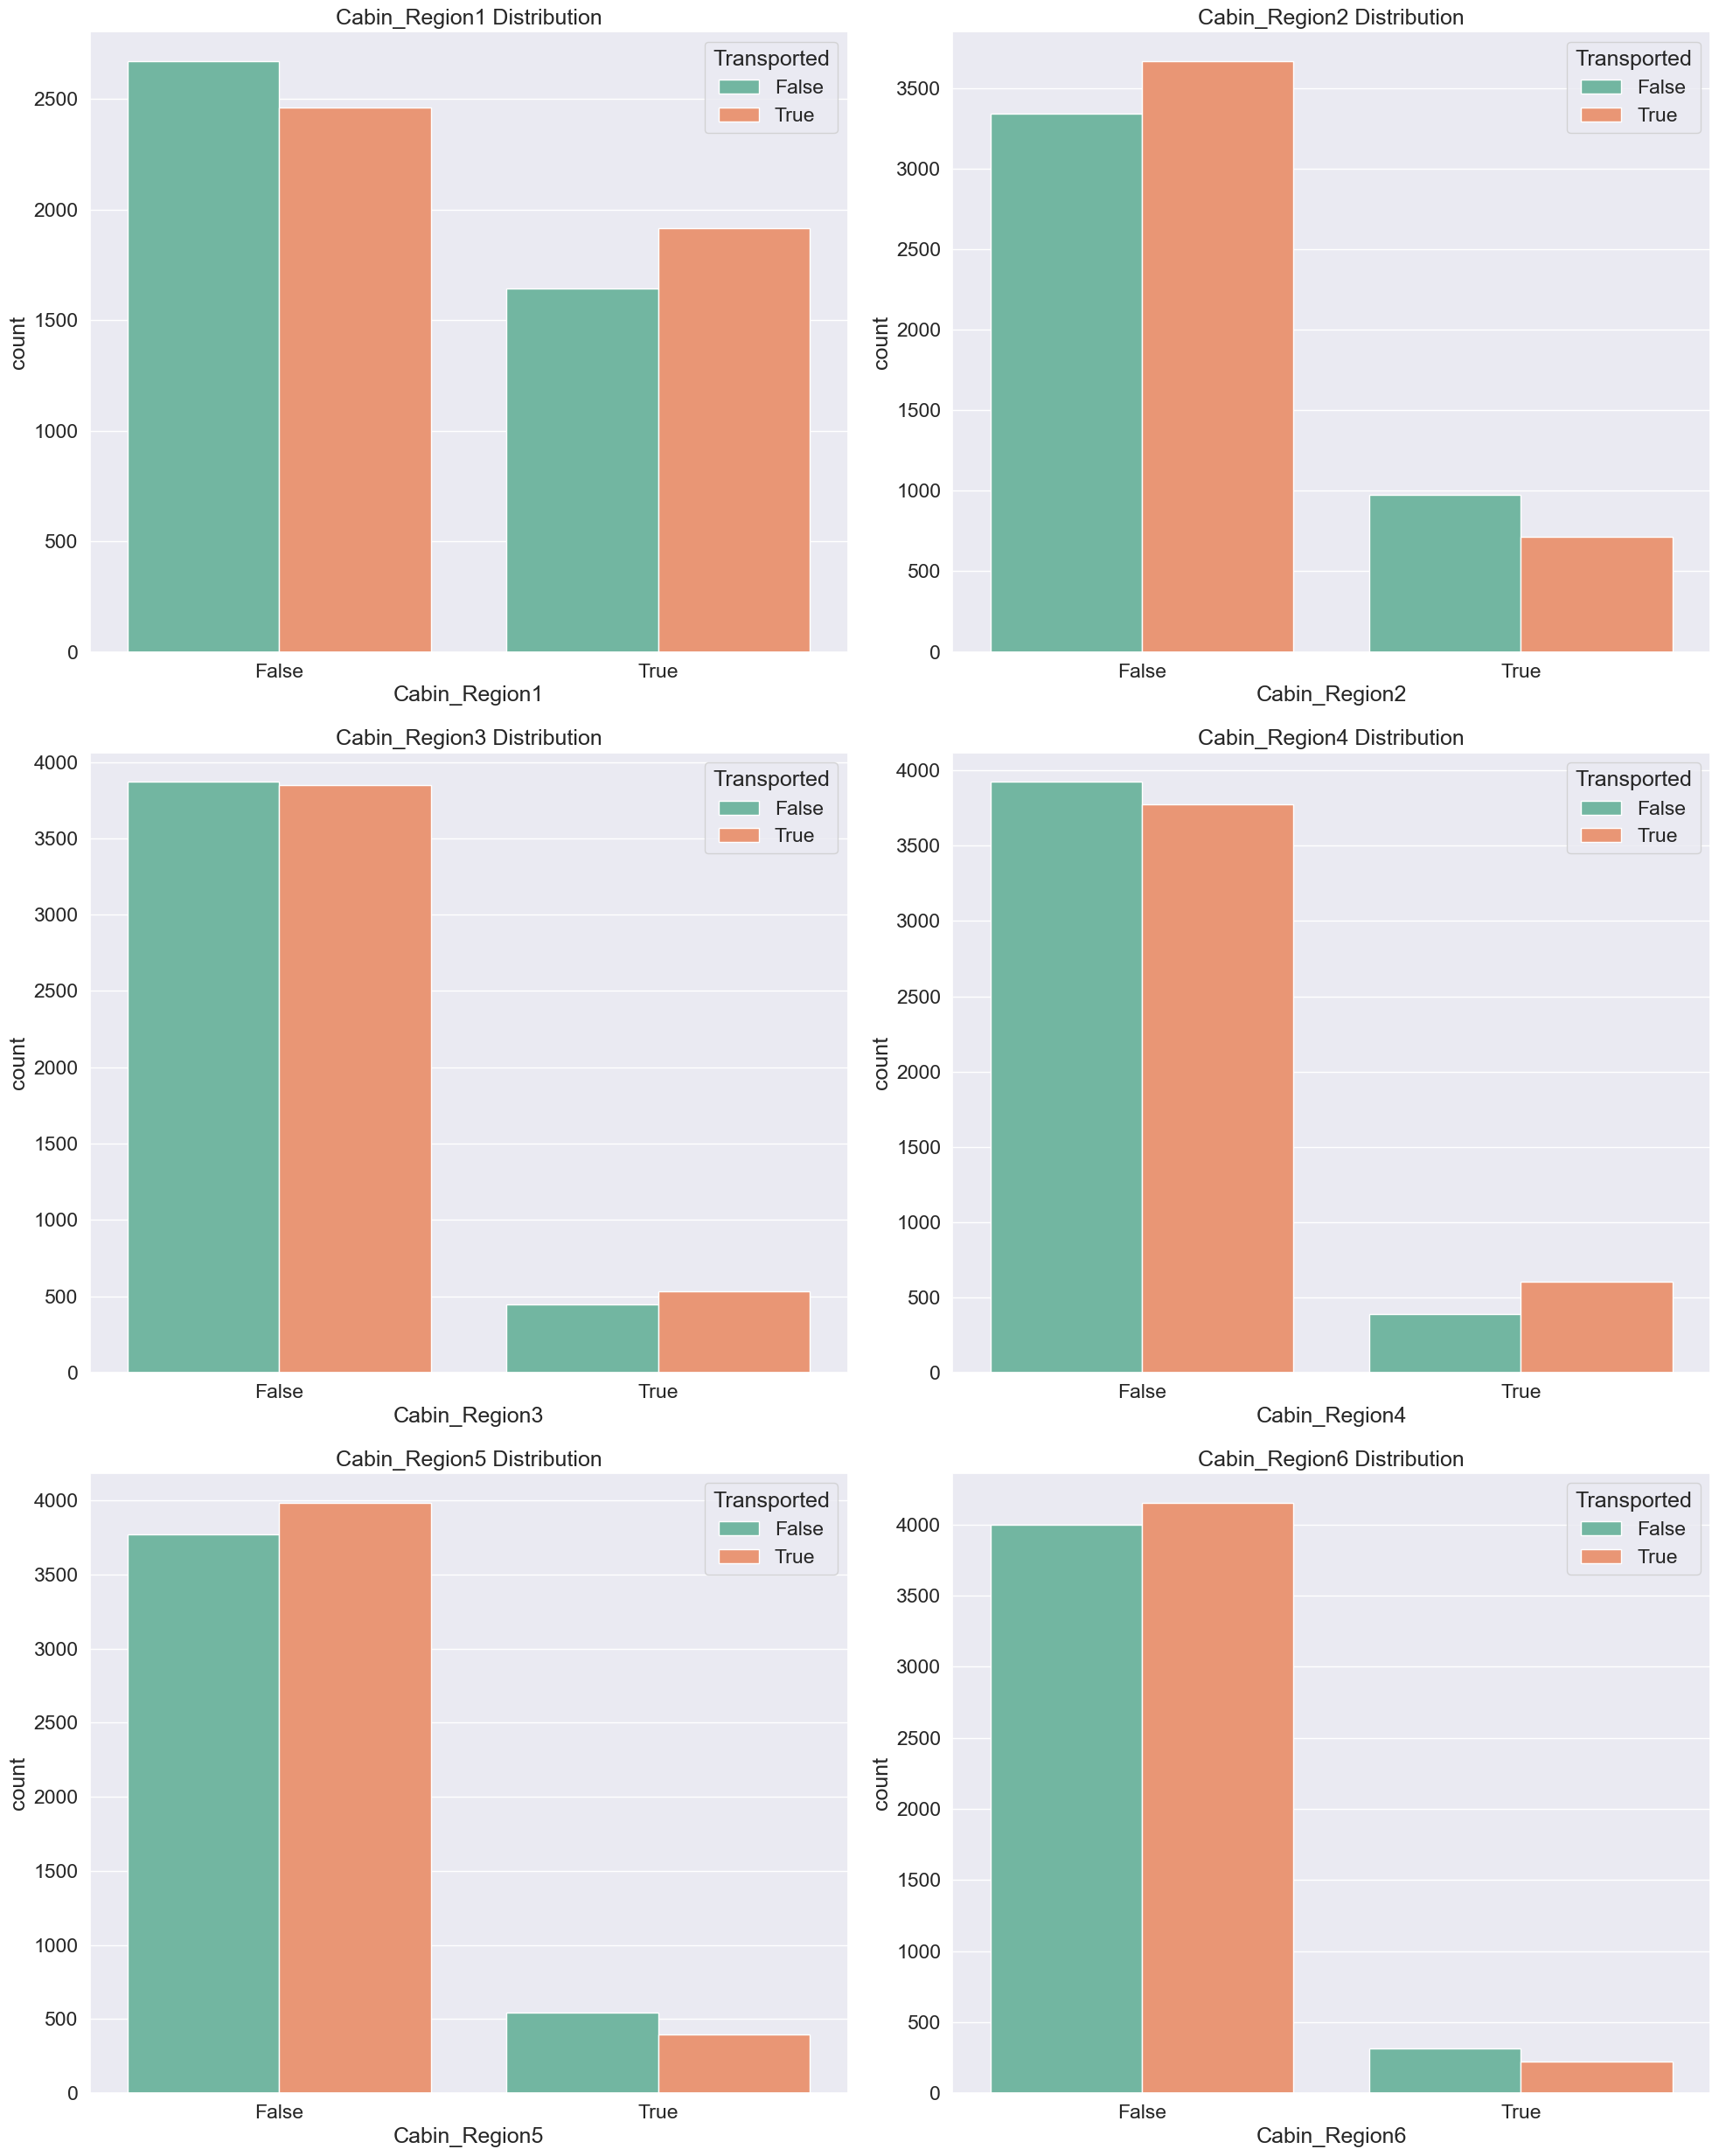

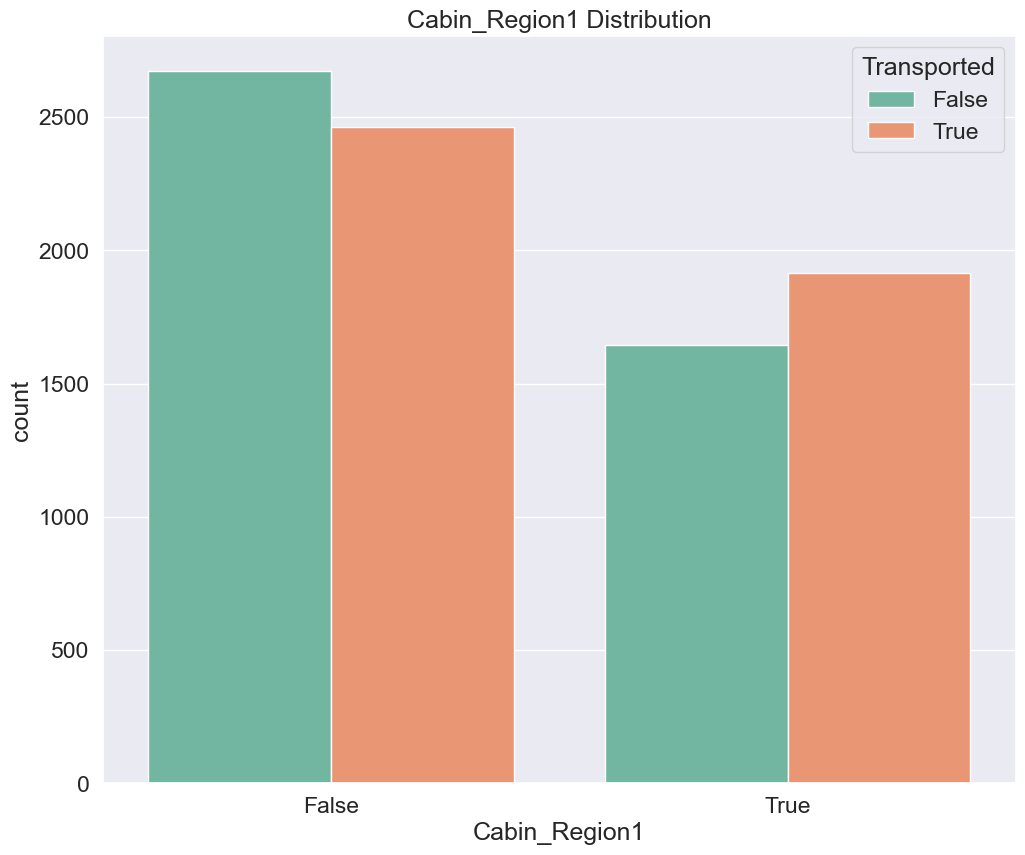

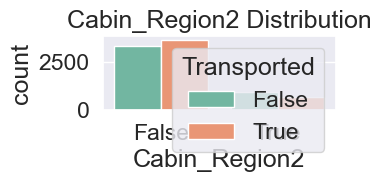

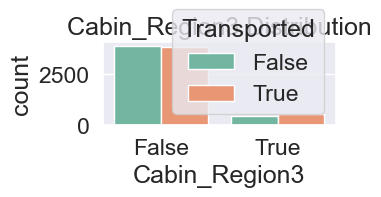

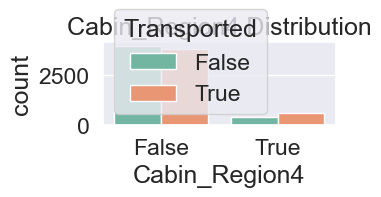

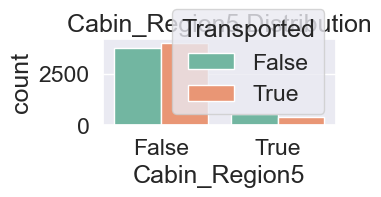

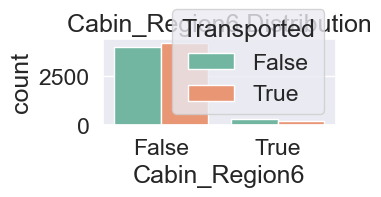

In [93]:
cols=["Cabin_Region1","Cabin_Region2","Cabin_Region3","Cabin_Region4","Cabin_Region5","Cabin_Region6"]
plt.figure(figsize=(20,25))
for idx,value in enumerate(cols):
    plt.subplot(3,2,idx+1)
    sns.countplot(x=value, hue="Transported", data=train_df, palette="Set2")
    plt.title(f"{value} Distribution")
    plt.tight_layout()
    plt.show()




In [ ]:
[0,20,40,60,80]
